In [60]:
import numpy as np
from PIL import Image
import pandas as pd
from glob import glob

In [61]:
computername = 'Hong'
consensus_grades_severity = pd.read_csv(f'/mnt/c/Users/{computername}/Dropbox/chla_fundus/consensus_grades_severity.csv')
labels = pd.read_csv(f'/mnt/c/Users/{computername}/Dropbox/chla_fundus/labels.csv')
metadata = pd.read_csv(f'/mnt/c/Users/{computername}/Dropbox/chla_fundus/metadata.csv')

## Severity Classification

Create dataset train/test/val in form of pandas dataframe

In [62]:
# get severity labels of 1,2,3,4,5 (less to more severe)
def get_subject_number(path):
    return int(path.split('_')[0])

severity_labels = consensus_grades_severity.drop(['Unnamed: 0','Filename', 'Optos'], axis=1).rename(columns={"original name": "path", "consensus_grade": "labels"})
severity_labels['subject'] = severity_labels['path'].apply(get_subject_number)

# get severity labels of 0 (Healthy)
pseudopap = labels[labels.label==1].drop(['site'], axis=1)
pseudopap['labels'] = pseudopap['label'] * 0
pseudopap = pseudopap.drop(['label'], axis=1)

# concat two above
severity_labels = pd.concat([severity_labels, pseudopap], ignore_index=True)

In [66]:
severity_labels.head()

path  labels  subject
0  328_visit01_photo02.jpg       2      328
1  180_visit01_photo02.jpg       3      180
2   33_visit02_photo01.jpg       1       33
3  182_visit03_photo01.jpg       3      182
4  225_visit01_photo01.jpg       4      225

In [ ]:
for path in severity_labels.path:
    

In [64]:
from sklearn.model_selection import train_test_split
import numpy as np

X_trainval, X_test, y_trainval, y_test = train_test_split(severity_labels['path'], severity_labels['labels'], test_size=0.2, random_state=2023, stratify=severity_labels['labels'])
X_train, X_val, y_train, y_val= train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=2023)

In [58]:
y_train.value_counts()

0    305
3     88
1     75
2     62
4     40
5      7
Name: labels, dtype: int64

In [59]:
y_val.value_counts()

0    76
2    20
1    18
3    16
4     8
5     7
Name: labels, dtype: int64

## EDA stuff

In [8]:
labels = labels.sort_values(by=['subject']).reset_index(drop=True)

In [9]:
labels[labels.label==1].reset_index(drop=True)

subject                     path  site  label
0          3    3_visit01_photo02.jpg     2      0
1          3    3_visit01_photo01.jpg     2      0
2         30   30_visit01_photo02.jpg     6      0
3         30   30_visit01_photo01.jpg     6      0
4         33   33_visit02_photo02.jpg     6      0
..       ...                      ...   ...    ...
377      342  342_visit01_photo01.jpg     1      0
378      343  343_visit01_photo01.jpg     1      0
379      343  343_visit02_photo01.jpg     1      0
380      343  343_visit02_photo02.jpg     1      0
381      343  343_visit01_photo02.jpg     1      0

[382 rows x 4 columns]

In [106]:
allimgs = glob('/mnt/c/Users/PCM/Dropbox/chla_fundus/full/*')

In [114]:
allpatients = set([int(x.split('/')[-1].split('_')[0]) for x in allimgs[:-1]])

In [ ]:
(allpatients - allpatients.intersection(binarylabel.union(multiclasslabel))).intersection(set(test.subject))

In [150]:
len(multiclasslabel.intersection(binarylabel))

105

In [146]:
len(binarylabel)

236

In [147]:
len(multiclasslabel)

115

In [111]:
int(allimgs[0].split('/')[-1].split('_')[0])

100

In [ ]:
[consensus_grades_severity.consensus_grade == 1]

In [7]:
labels[labels.label==1].reset_index(drop=True)

subject                     path  site  label
0        290  290_visit01_photo02.jpg     1      1
1         58   58_visit03_photo02.jpg     6      1
2         62   62_visit03_photo02.jpg     6      1
3        222  222_visit01_photo01.jpg     5      1
4         55   55_visit05_photo02.jpg     6      1
..       ...                      ...   ...    ...
472      136  136_visit01_photo01.jpg     2      1
473      268  268_visit03_photo01.jpg     5      1
474      290  290_visit02_photo02.jpg     1      1
475       56   56_visit02_photo02.jpg     6      1
476      255  255_visit01_photo02.jpg     5      1

[477 rows x 4 columns]

In [29]:
binarylabel = set(labels[labels.label==0].reset_index(drop=True).subject)
multiclasslabel = set(consensus_grades_severity[consensus_grades_severity.consensus_grade == 5].iloc[:,2].str.split('_', expand=True).iloc[:,0].to_numpy().astype(int))

In [30]:
len(multiclasslabel.intersection(binarylabel))

7

In [96]:
set(consensus_grades_severity.iloc[:,2].str.split('_', expand=True).iloc[:,0].to_numpy().astype(int))

{3,
 30,
 33,
 36,
 39,
 44,
 57,
 111,
 112,
 114,
 127,
 129,
 137,
 140,
 141,
 142,
 143,
 145,
 150,
 155,
 159,
 160,
 173,
 174,
 175,
 176,
 178,
 179,
 180,
 181,
 182,
 185,
 186,
 187,
 188,
 189,
 192,
 193,
 195,
 196,
 197,
 198,
 199,
 200,
 203,
 204,
 205,
 206,
 207,
 208,
 211,
 212,
 213,
 214,
 218,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 300,
 301,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 338,
 339,
 340,
 341,
 342,
 343}

In [90]:
a =   set(consensus_grades_severity.iloc[:,2].str.split('_', expand=True).iloc[:,0].to_numpy().astype(int)) - set(labels[labels.label==1].reset_index(drop=True).subject)
a

{3,
 30,
 33,
 36,
 39,
 44,
 57,
 111,
 112,
 114,
 127,
 129,
 137,
 140,
 141,
 142,
 143,
 145,
 150,
 155,
 159,
 160,
 173,
 174,
 175,
 176,
 178,
 179,
 180,
 181,
 182,
 185,
 186,
 187,
 188,
 189,
 192,
 193,
 195,
 196,
 197,
 198,
 199,
 200,
 203,
 204,
 205,
 206,
 207,
 208,
 211,
 212,
 213,
 214,
 218,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 300,
 301,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 338,
 339,
 340,
 341,
 342,
 343}

In [71]:
len(set(test.subject) - set(labels.subject))

0

In [25]:
labels

subject                     path  site  label
0          2    2_visit01_photo01.jpg     2      1
1          2    2_visit02_photo01.jpg     2      1
2          2    2_visit02_photo02.jpg     2      1
3          2    2_visit01_photo02.jpg     2      1
4          3    3_visit01_photo02.jpg     2      0
..       ...                      ...   ...    ...
854      347  347_visit01_photo01.jpg     1      1
855      347  347_visit02_photo01.jpg     1      1
856      347  347_visit03_photo01.jpg     1      1
857      347  347_visit01_photo02.jpg     1      1
858      347  347_visit02_photo02.jpg     1      1

[859 rows x 4 columns]

In [4]:
train = labels[labels.subject < 260]
val   = labels[labels.subject < 294][labels.subject > 260].reset_index(drop=True)
test   = labels[labels.subject > 294].reset_index(drop=True)

/tmp/ipykernel_10150/2338270333.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val   = labels[labels.subject < 294][labels.subject > 260].reset_index(drop=True)


In [5]:
print('Length of train, val, test (images)', len(train),len(val),len(test))
print('Length of train, val, test (subjects)', len(set(train.subject)),len(set(val.subject)),len(set(test.subject)))

Length of train, val, test (images) 555 134 148
Length of train, val, test (subjects) 148 33 53


In [19]:
!mkdir /data/hongn/chla_fundus/train
!mkdir /data/hongn/chla_fundus/test
!mkdir /data/hongn/chla_fundus/val
!mkdir /data/hongn/chla_fundus/train/papilledema
!mkdir /data/hongn/chla_fundus/test/papilledema
!mkdir /data/hongn/chla_fundus/val/papilledema
!mkdir /data/hongn/chla_fundus/train/psuedopapilledema
!mkdir /data/hongn/chla_fundus/test/psuedopapilledema
!mkdir /data/hongn/chla_fundus/val/psuedopapilledema

In [ ]:
import shutil
datasetsplit = 'val'
dataa = globals()[datasetsplit]
for i in range(len(dataa)):
    if(train.label[i] == 1):
        try:
            shutil.copy('/data/avramidi/chla_fundus/' + dataa.path[i], f'/data/hongn/chla_fundus/{datasetsplit}/papilledema/')
        except:
            print('No Image name found')
    else:
        try:
            shutil.copy('/data/avramidi/chla_fundus/' + dataa.path[i], f'/data/hongn/chla_fundus/{datasetsplit}/psuedopapilledema/')
        except:
            print('No Image name found')
    

In [6]:
image_paths = glob('/data/hongn/chla_fundus/train/psuedopapilledema/*.jpg')
len(image_paths)

144

In [7]:
image_paths

['/data/hongn/chla_fundus/train/psuedopapilledema/225_visit01_photo02.jpg',
 '/data/hongn/chla_fundus/train/psuedopapilledema/234_visit01_photo01.jpg',
 '/data/hongn/chla_fundus/train/psuedopapilledema/232_visit02_photo01.jpg',
 '/data/hongn/chla_fundus/train/psuedopapilledema/230_visit03_photo02.jpg',
 '/data/hongn/chla_fundus/train/psuedopapilledema/238_visit02_photo01.jpg',
 '/data/hongn/chla_fundus/train/psuedopapilledema/231_visit02_photo01.jpg',
 '/data/hongn/chla_fundus/train/psuedopapilledema/230_visit02_photo02.jpg',
 '/data/hongn/chla_fundus/train/psuedopapilledema/233_visit03_photo01.jpg',
 '/data/hongn/chla_fundus/train/psuedopapilledema/218_visit03_photo01.jpg',
 '/data/hongn/chla_fundus/train/psuedopapilledema/238_visit02_photo02.jpg',
 '/data/hongn/chla_fundus/train/psuedopapilledema/238_visit01_photo02.jpg',
 '/data/hongn/chla_fundus/train/psuedopapilledema/224_visit09_photo01.jpg',
 '/data/hongn/chla_fundus/train/psuedopapilledema/240_visit03_photo02.jpg',
 '/data/hong

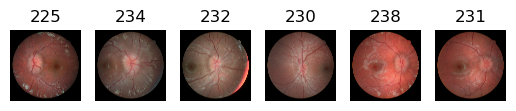

In [14]:
import os
import matplotlib.pyplot as plt
import PIL

for num, x in enumerate(image_paths[0:6]):
    img = PIL.Image.open(x)
    plt.subplot(1,6,num+1)
    plt.title(x.split('/')[-1].split('_')[0])
    plt.axis('off')
    plt.imshow(img)

In [11]:
x.split('/')[-1].split('_')[0]

'231'

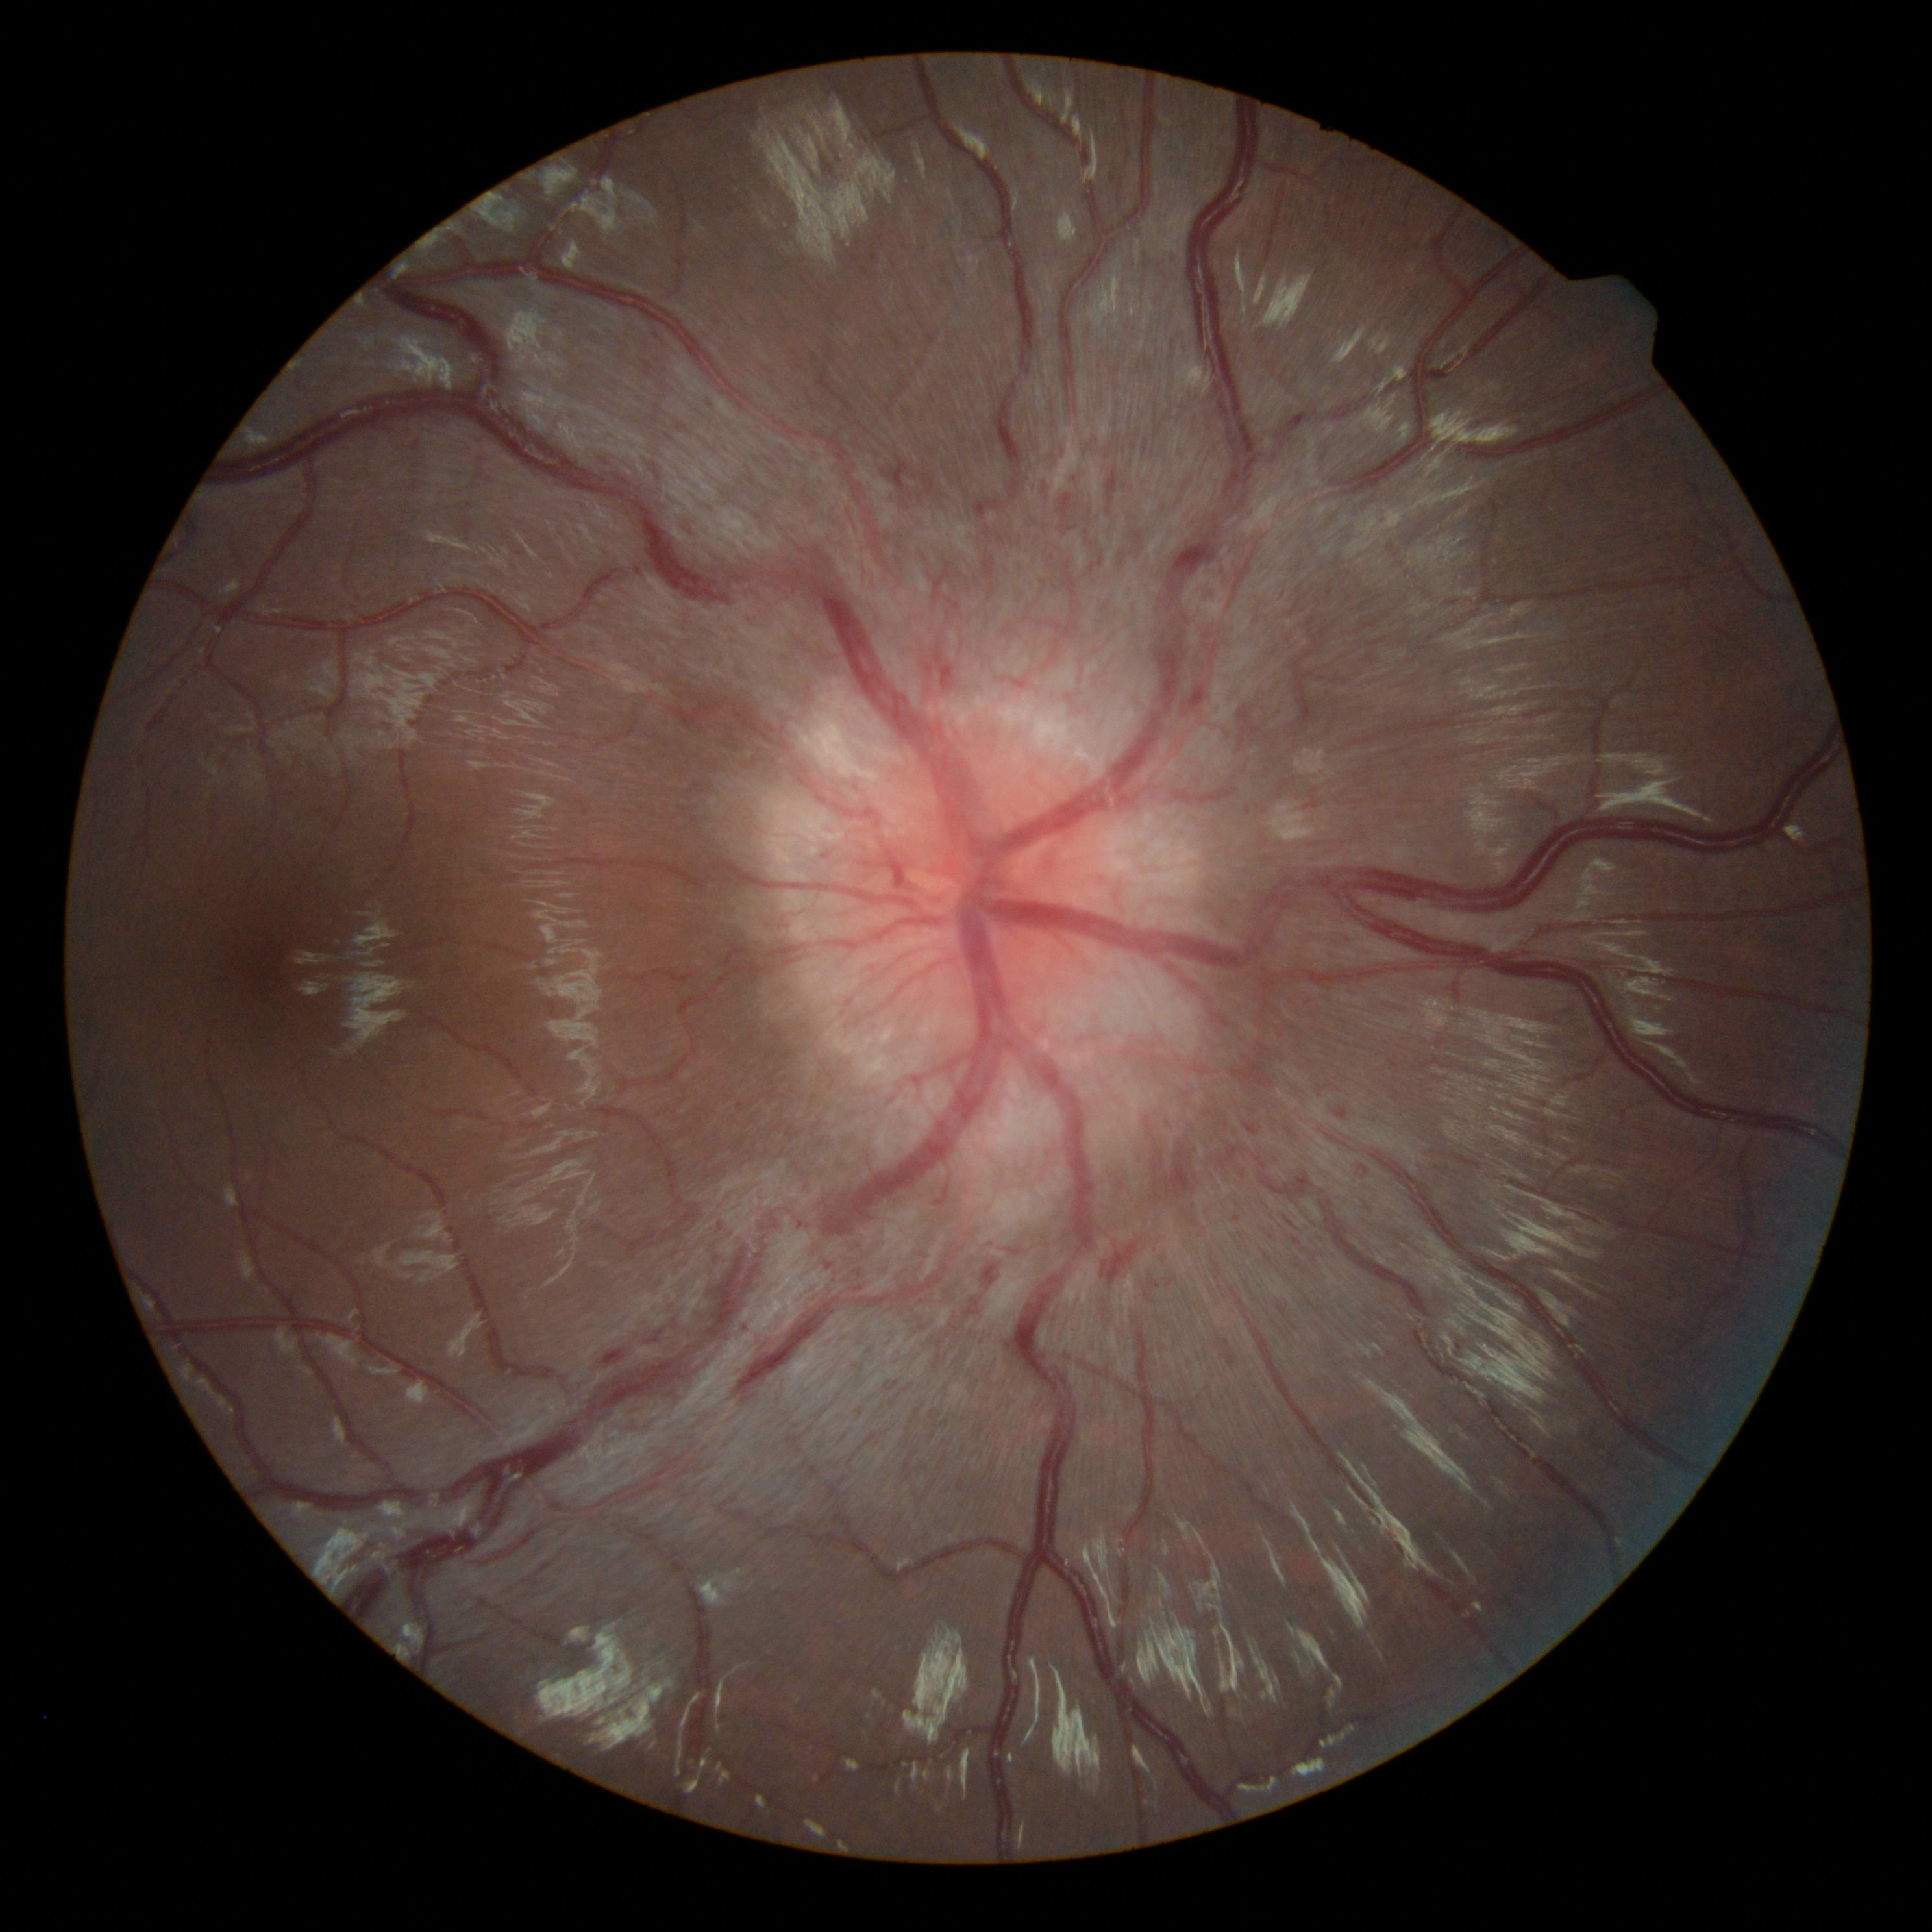

In [16]:
Image.open(image_paths[1])

In [63]:
path2fundus = '/mnt/c/Users/PCM/Dropbox/chla_fundus_croped/'
saved_dict_ext = pd.read_csv(path2fundus + 'saved_dict_ext.csv')
# Calculate number of patents in test-set
setpatients = [x.split('_')[0] for x in saved_dict_ext.image.to_numpy()]
len(set(setpatients))

48

In [64]:
test = labels[labels['subject'].isin(list(map(int, setpatients)))].reset_index(drop=True)

In [66]:
set(test.subject)

{2,
 20,
 26,
 27,
 41,
 44,
 45,
 50,
 53,
 63,
 67,
 84,
 90,
 99,
 107,
 126,
 141,
 174,
 180,
 181,
 185,
 189,
 193,
 195,
 199,
 211,
 218,
 222,
 223,
 224,
 233,
 238,
 253,
 257,
 261,
 263,
 266,
 270,
 275,
 285,
 289,
 292,
 298,
 307,
 318,
 320,
 330,
 331}

In [9]:
trainandval = labels[~labels['subject'].isin(list(map(int, setpatients)))].reset_index(drop=True)
trainandval.head()

subject                   path  site  label
0        3  3_visit01_photo02.jpg     2      0
1        3  3_visit01_photo01.jpg     2      0
2        4  4_visit01_photo02.jpg     2      1
3        4  4_visit02_photo02.jpg     2      1
4        4  4_visit02_photo01.jpg     2      1

In [10]:
train = trainandval[trainandval.subject < 300]
val = trainandval[trainandval.subject > 300].reset_index(drop=True)
print(len(train), len(val))

568 120


In [12]:
!rm -rf /data/hongn/chla_fundus/test
!rm -rf /data/hongn/chla_fundus/train
!rm -rf /data/hongn/chla_fundus/val
!mkdir /data/hongn/chla_fundus/train
!mkdir /data/hongn/chla_fundus/test
!mkdir /data/hongn/chla_fundus/val
!mkdir /data/hongn/chla_fundus/train/papilledema
!mkdir /data/hongn/chla_fundus/test/papilledema
!mkdir /data/hongn/chla_fundus/val/papilledema
!mkdir /data/hongn/chla_fundus/train/psuedopapilledema
!mkdir /data/hongn/chla_fundus/test/psuedopapilledema
!mkdir /data/hongn/chla_fundus/val/psuedopapilledema

In [16]:
import shutil
datasetsplit = 'test'

dataa = globals()[datasetsplit]
for i in range(len(dataa)):
    if(dataa.label[i] == 1):
        try:
            shutil.copy(f'{path2fundus}full/' + dataa.path[i], f'{path2fundus}{datasetsplit}/papilledema/')
        except:
            print('No Image name found')
    else:
        try:
            shutil.copy(f'{path2fundus}full/' + dataa.path[i], f'{path2fundus}{datasetsplit}/psuedopapilledema/')
        except:
            print('No Image name found')

No Image name found
No Image name found
